<a href="https://colab.research.google.com/github/PILKWANG/Arduino/blob/master/python%20code/pattern%20recognition/3.Mw_BP/Mw_BP_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#인공지능과 과학교육(회귀분석)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# <Step1. 탐색> 분자량, 끓는점 데이터 살펴보기

### [분자량, 끓는점 데이터셋의 기본 정보]

In [ ]:
BP_file_path = 'sample_data/BoilingPoint_Mw_alcohol(200).csv'
BP_skl = pd.read_csv(BP_file_path)
BP_skl.dropna()

,name,molweight,boiling point (K),type
0,(-)-b-citronellol,156.26820,498.65,alcohol
1,"(1R,2S,5R)-(-)-menthol",156.26820,489.55,alcohol
2,(<+->)-2-butanol,74.12280,372.00,alcohol
3,(R)-(+)-b-citronellol,156.26820,480.78,alcohol
4,(R)-(-)-1-amino-2-propanol,75.11060,433.15,alcohol
...,...,...,...,...
195,"2,4-diethylphenol",150.22056,501.15,alcohol
196,"2,4-dimethyl-1-hexanol",130.23032,448.15,alcohol
197,"2,4-dimethyl-1-pentanol",116.20344,432.15,alcohol
198,"2,4-dimethyl-2,3-pentanediol",132.20284,459.15,alcohol


In [ ]:
BP_skl.columns

Index(['name', 'molweight', 'boiling point (K)', 'type'], dtype='object')

In [ ]:
BP_skl.head()

,name,molweight,boiling point (K),type
0,(-)-b-citronellol,156.2682,498.65,alcohol
1,"(1R,2S,5R)-(-)-menthol",156.2682,489.55,alcohol
2,(<+->)-2-butanol,74.1228,372.00,alcohol
3,(R)-(+)-b-citronellol,156.2682,480.78,alcohol
4,(R)-(-)-1-amino-2-propanol,75.1106,433.15,alcohol


In [ ]:
print(BP_skl.shape)

(200, 4)


-----

### [회귀 분석에 사용할 피처 살펴보기]

In [ ]:
BP_features_df = BP_skl[['molweight', 'boiling point (K)']]

In [ ]:
# 피처 각각에 대한 scatter을 출력합니다.
def plot_scatter_each_column(df):
    plt.rcParams['figure.figsize'] = [20, 16]
    fig = plt.figure(1)
         
    plt.scatter(df[df.columns[0]], df[df.columns[1]], color='r')
    plt.xlabel('Mw')
    plt.ylabel('BP')
    plt.show()

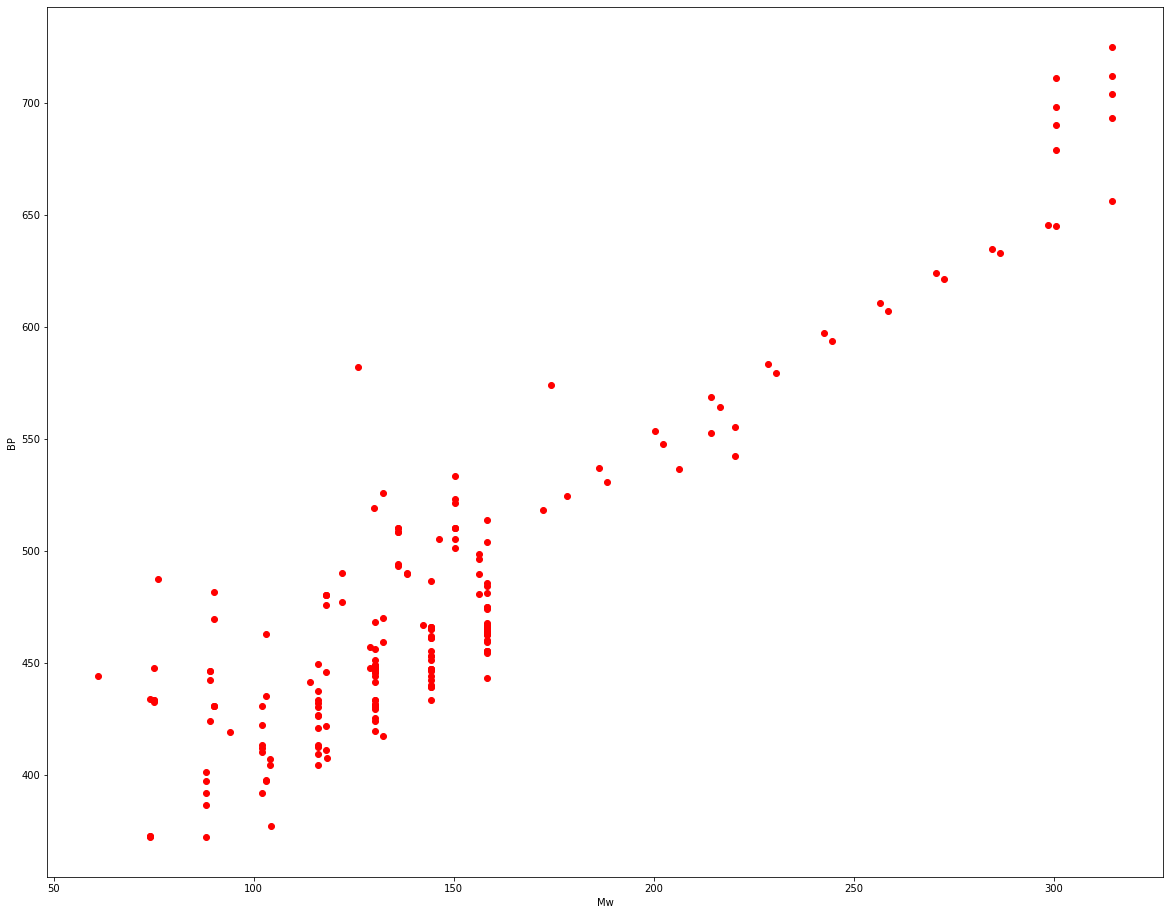

In [ ]:
plot_scatter_each_column(BP_features_df)

-----

# <Step2. 예측> : 압력과 부피 관계 예측하기

### [회귀 분석 적용하기]

##### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터 지정
x_train = BP_skl[['molweight']]
y_train = BP_skl[['boiling point (K)']]

In [ ]:
print(x_train.head())

   molweight
0   156.2682
1   156.2682
2    74.1228
3   156.2682
4    75.1106


In [ ]:
print(y_train.head())

   boiling point (K)
0             498.65
1             489.55
2             372.00
3             480.78
4             433.15


##### 회귀 분석 계수 학습 & 학습된 계수 출력

In [ ]:
# 회귀 분석 계수를 학습합니다 (회귀 모델 학습)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

In [ ]:
# 학습된 계수를 출력합니다.
print(lr.coef_,lr.intercept_)
BP = lr.predict([[450]])
print(BP)

[[1.1921057]] [301.75230787]
[[838.19987295]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
BP_skl.columns
print(f'y절편 : {lr.intercept_}, 기울기:{lr.coef_}')

y절편 : [301.75230787], 기울기:[[1.1921057]]


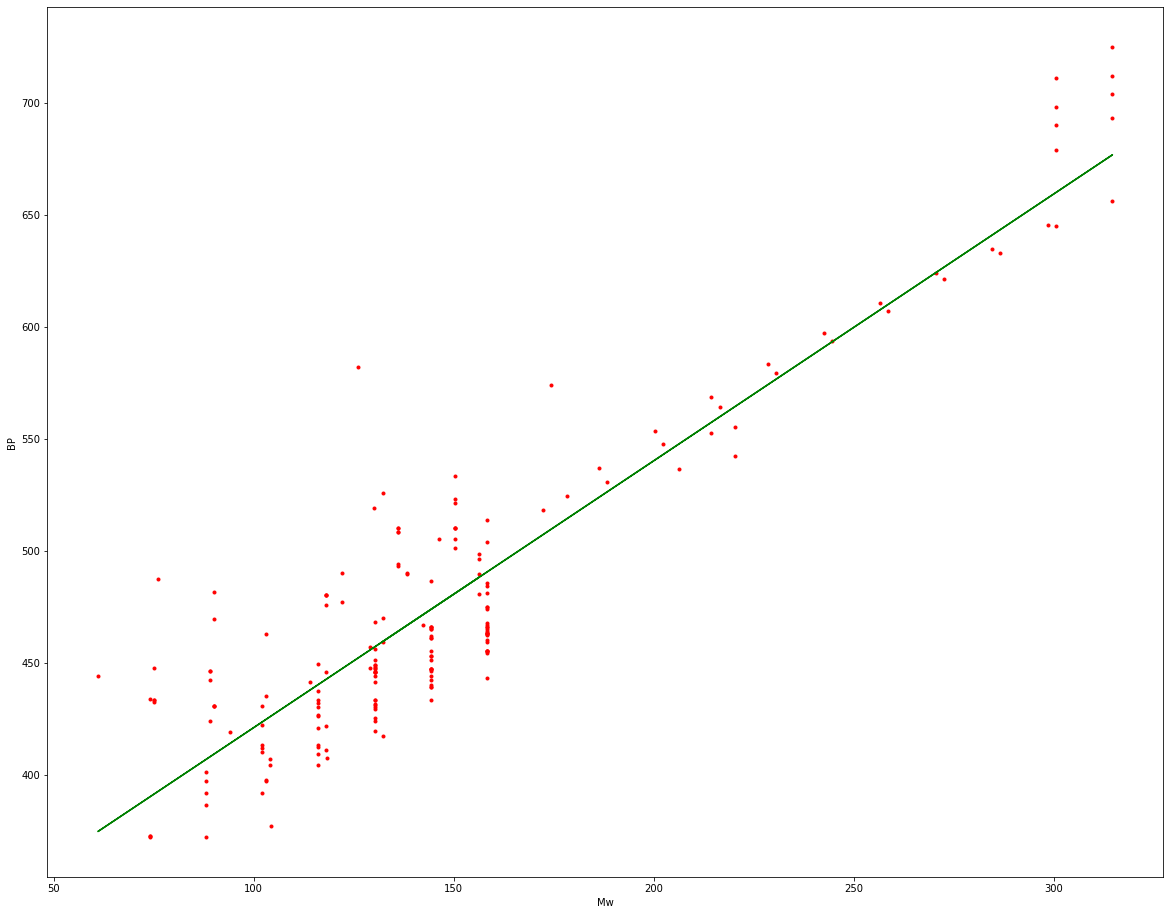

In [ ]:
plt.xlabel('Mw')
plt.ylabel('BP')
plt.plot(x_train,y_train,'r.')
plt.plot(x_train,lr.predict(x_train),color='g')

-----

# <Step3. 평가> : 예측 모델 평가하기

##### RMSE score

In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # test RMSE score를 출력합니다.

29.415810001866273


-----

# <Step4. 다중선형회귀> 변수 만들기

In [ ]:
train_poly = np.column_stack((x_train**2, x_train))

In [ ]:
print(train_poly.shape)

(200, 2)


In [ ]:
lr = linear_model.LinearRegression()
lr.fit(train_poly, y_train)

print(lr.predict([[60**2,60]]))

[[400.75047819]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[0.00225695 0.33442399]] [372.56003593]


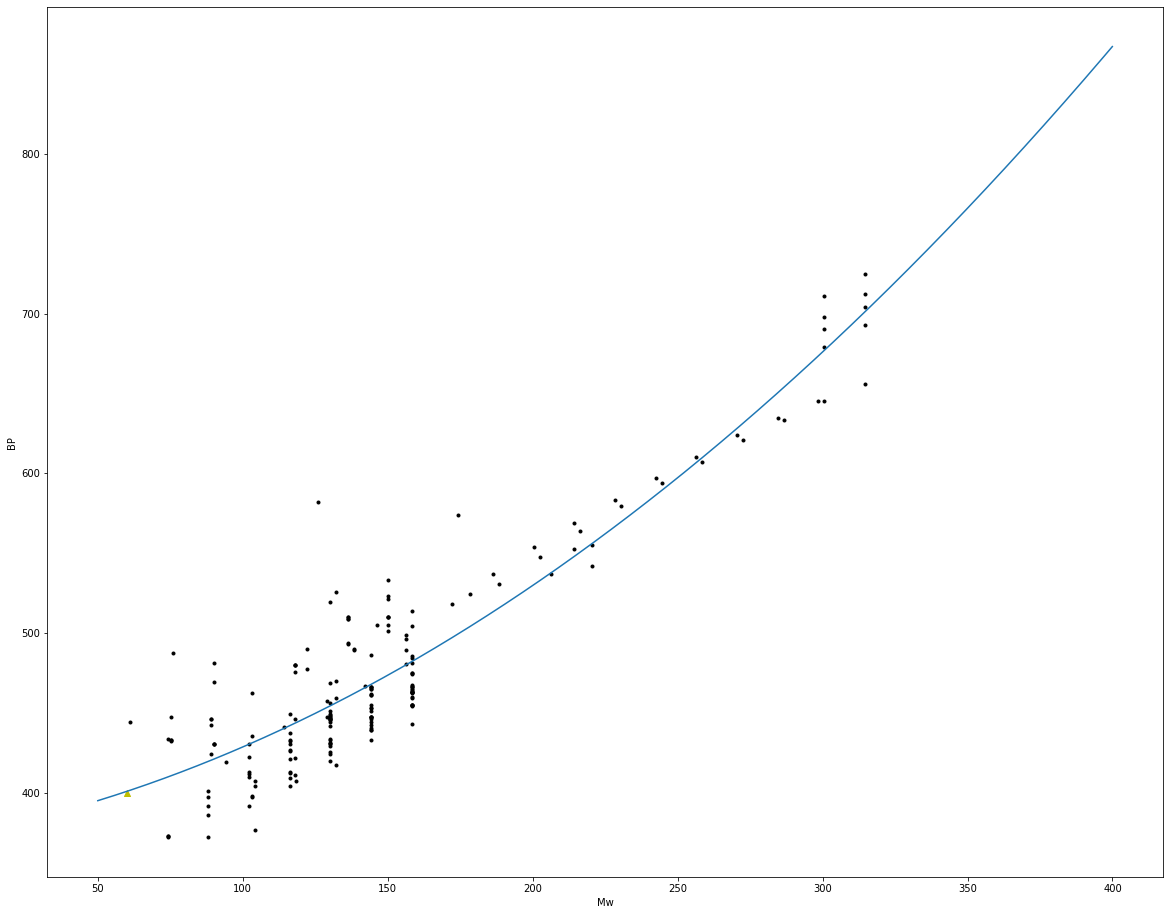

In [ ]:
plt.plot(x_train, y_train,'k.')
plt.scatter(60, 400, marker='^', color='y')

point = np.arange(50, 400, 0.05)
plt.plot(point, 0.00225695*point**2 + 0.33442399*point +372.56003593)

plt.xlabel('Mw')
plt.ylabel('BP')
plt.show()

In [ ]:
# 회귀 분석 모델을 평가합니다.
y_poly_predictions = lr.predict(train_poly)
print(sqrt(mean_squared_error(y_train, y_poly_predictions))) # test RMSE score를 출력합니다.

27.926977507412644
